<a href="https://colab.research.google.com/github/utkarsh0702/Projects/blob/master/Image_Compression_with_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from skimage import io
from sklearn.cluster import KMeans

from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets

In [16]:
!pip install ipywidgets

In [2]:
from zipfile import ZipFile
file_name = 'Image Compression.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [0]:
plt.rcParams['figure.figsize']=(20,12)

# On a single image with fixed value of k

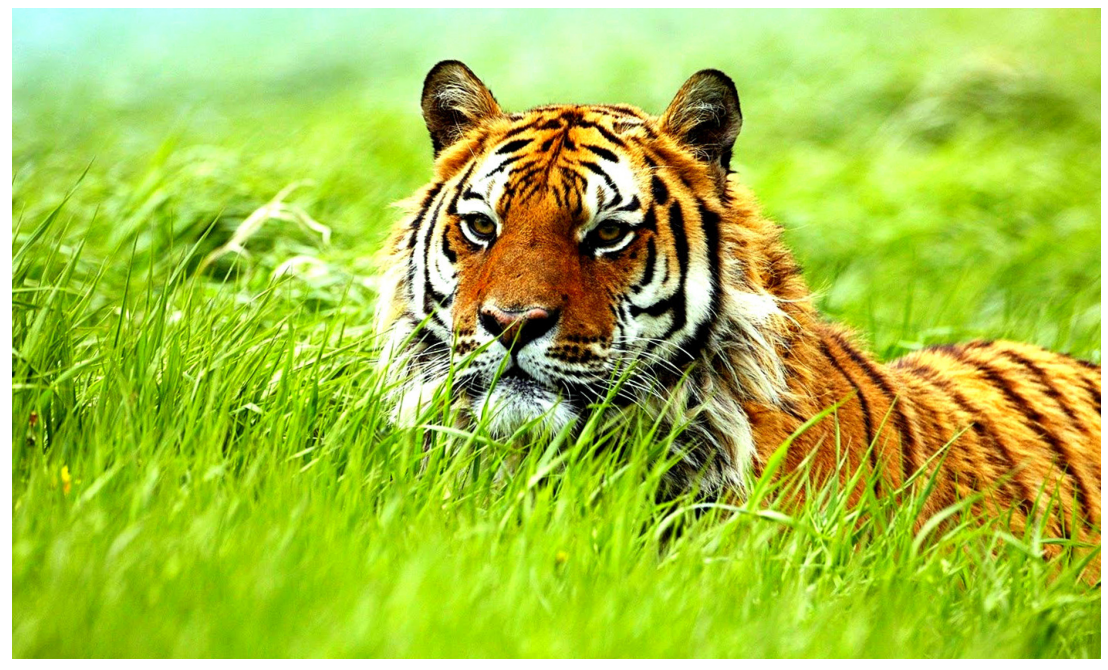

In [4]:
img= io.imread('Image Compression/animal-wallpapers-high-quality-For-Free-Wallpaper.jpg')
ax= plt.axes(xticks=[], yticks=[])
ax.imshow(img)

In [5]:
img.shape

(846, 1414, 3)

In [6]:
#Normalizing and Flattening the Data
img_data= (img/ 255.0).reshape(-1,3)
img_data.shape

(1196244, 3)

### Visualizing the color space using point cloud

In [0]:
def colorSpace(img_data, title, num_pixels=10000, colors=None):
    if colors is None:
        colors = img_data
    rand = np.random.RandomState(42)
    index = rand.permutation(img_data.shape[0])[:num_pixels]
    colors = colors[index]
    R, G, B = img_data[index].T
    fig, ax = plt.subplots(1, 3, figsize=(12,8))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
    ax[2].scatter(G, B, color=colors, marker='.')
    ax[2].set(xlabel='Green', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
    fig.suptitle(title, size=20)

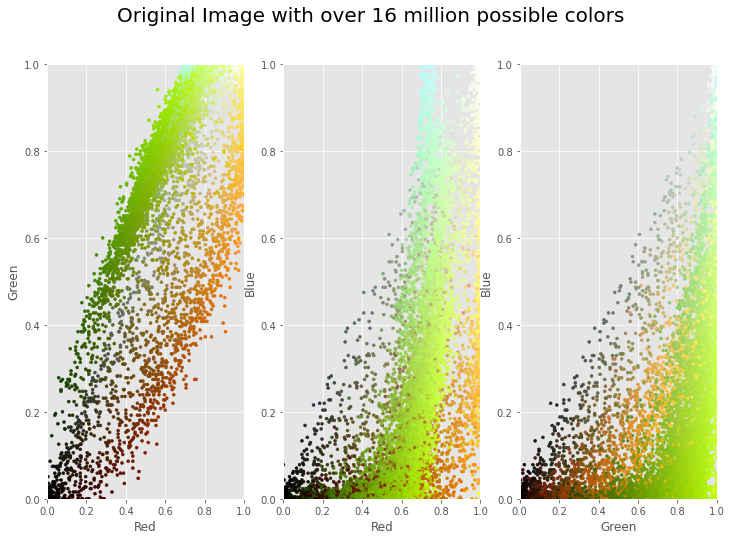

In [8]:
colorSpace(img_data, title='Original Image with over 16 million possible colors')

### Compressing the image and visualizing it using color space

In [0]:
from sklearn.cluster import MiniBatchKMeans

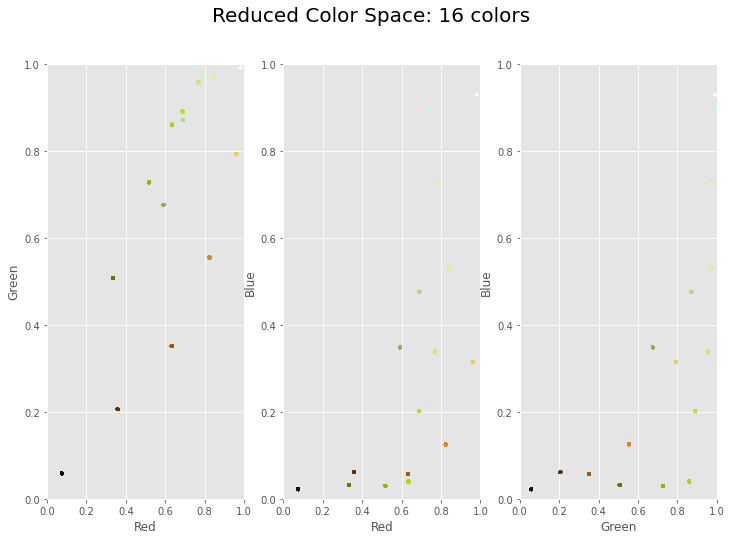

In [10]:
kmeans= MiniBatchKMeans(16). fit(img_data)
k_colors= kmeans.cluster_centers_[kmeans.predict(img_data)]
colorSpace(k_colors, title='Reduced Color Space: 16 colors')

In [0]:
k_img= k_colors.reshape(img.shape)

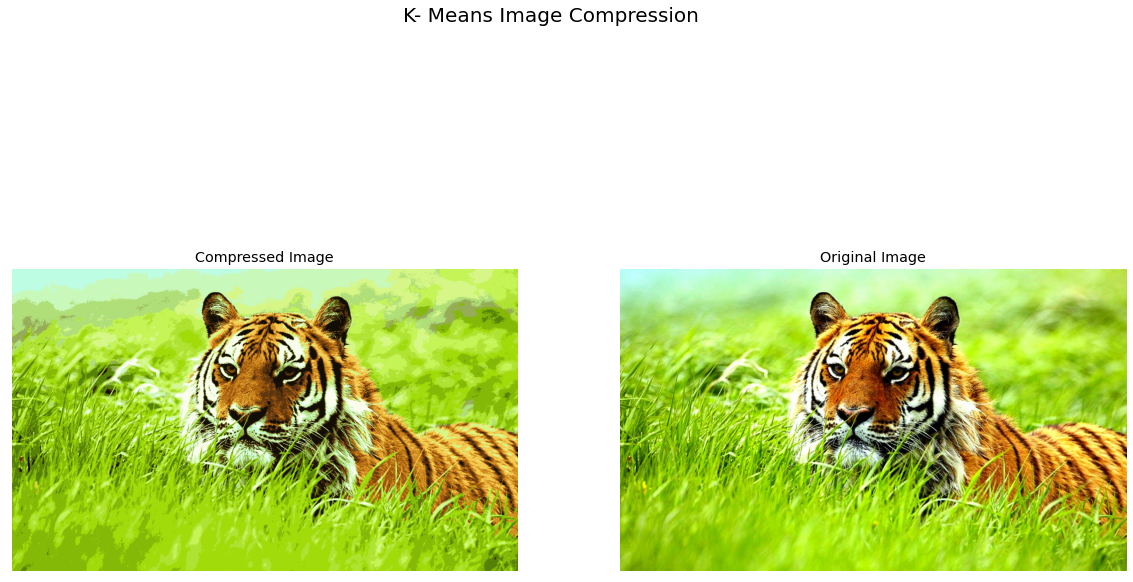

In [12]:
fig, (ax1, ax2)= plt.subplots(1,2)
fig.suptitle('K- Means Image Compression', fontsize=20)
ax1.set_title('Compressed Image')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.imshow(k_img)
ax2.set_title('Original Image')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.imshow(img)

plt.show()


# Dynamic Changing of K-Mean

In [20]:
img_dir='Image Compression/'
@interact(image= os.listdir(img_dir), k= IntSlider(min=1, max= 100, step=1, value=16, contineous_update= False, layout= dict(width= '100%')))
def color_compression(image, k):
    img= io.imread(img_dir+image)
    img_data= (img/ 255.0).reshape(-1,3)
    
    kmeans= MiniBatchKMeans(k). fit(img_data)
    k_colors= kmeans.cluster_centers_[kmeans.predict(img_data)]
    k_img= k_colors.reshape(img.shape)
    
    fig, (ax1, ax2)= plt.subplots(1,2)
    fig.suptitle('K- Means Image Compression', fontsize=20)
    ax1.set_title('Compressed Image')
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.imshow(k_img)
    ax2.set_title('Original Image')
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.imshow(img)
    
    plt.show()

interactive(children=(Dropdown(description='image', options=('singapore--73635-16.jpg', '645b5911f213206c2b476…